In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt



hamdata = pd.read_csv("Turnstile_Usage_Data__2021.csv", sep=",")
#print(hamdata.info())

ilkdraft = hamdata.copy()

ilkdraft.drop("Line Name", axis = 1, inplace = True)
ilkdraft['datetime'] = pd.to_datetime(ilkdraft['Date']+' '+ilkdraft['Time'])
ilkdraft['Day'] = pd.to_datetime(ilkdraft['Date']).dt.day_name()
ilkdraft['Month'] = pd.to_datetime(ilkdraft['Date']).dt.month_name()
ilkdraft.rename(columns={"C/A" : "CA"} , inplace=True)
ilkdraft["Turnike"] = ilkdraft["CA"] + ilkdraft["Unit"] + ilkdraft["SCP"]
ilkdraft.drop("CA", axis=1, inplace = True)
ilkdraft.drop("Unit", axis=1, inplace = True)
ilkdraft.drop("SCP", axis=1, inplace = True)

#print(ilkdraft.info())
#print(ilkdraft.head(25))
#print(ilkdraft.value_counts("Description"))



#for column_name in ilkdraft.columns:
    #print(column_name,ilkdraft[column_name].nunique())

#print(ilkdraft.loc[138900:138950])

#print(ilkdraft[ilkdraft.duplicated(subset=['Turnike','Station','datetime'])])
#print(ilkdraft.shape)
ilkdraft.drop_duplicates(subset=['Turnike','Station','datetime'],inplace=True)
#print(ilkdraft.shape)

TData = ilkdraft.copy()  #TEMİZ DATA ->> TD
#print(TD.describe())

TData.sort_values(by='datetime',ascending=True, inplace=True)
TData.rename(columns=lambda x: x.strip())
TData.columns = TData.columns.str.replace(' ', '')

TData["NetGiris"] = (TData.groupby(['Station','Turnike'])['Entries'].shift(-1)-TData.groupby(['Station','Turnike'])['Entries'].shift(0))
TData["NetOut"] = (TData.groupby(['Station','Turnike'])['Exits'].shift(-1)-TData.groupby(['Station','Turnike'])['Exits'].shift(0))
#print(TData.head(20))
#print(TData.info())
#print(TData.value_counts("NetGiris"))
#print(TData.value_counts("NetOut"))
#print(TData.describe())
#plt.scatter(x='datetime',y='NetGiris',data=TData[TData['Month'] == 'April'])
#plt.show()


dfr = TData.loc[(TData.Description == 'REGULAR') & ((TData.Month == 'May')|(TData.Month == 'April')|(TData.Month == 'March'))]

dfr["Turnike_Yogunluk"] = dfr["NetGiris"] + dfr["NetOut"]

#print(dfr.value_counts("NetGiris"))
#print(dfr.value_counts("NetOut"))
#print(dfr.value_counts("Turnike_Yogunluk"))

#plt.figure(figsize=[25,25])
#plt.plot
#plt.plot(dfr.datetime,dfr.NetGiris,data=((dfr.Turnike == "PTH07R55000-01-06") & (dfr.Month == "May") & (dfr.Station == "CITY / BUS")))
#plt.scatter(x='datetime',y='NetGiris',data=dfr[dfr['Month'] == 'March'])
#plt.scatter(x='datetime',y='NetGiris',data=dfr[dfr['Month'] == 'April'])
#plt.show()

dfr

C:\Users\EMRE\AppData\Local\Temp\ipykernel_11368\2292363210.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["Turnike_Yogunluk"] = dfr["NetGiris"] + dfr["NetOut"]


,Station,Division,Date,Time,Description,Entries,Exits,datetime,Day,Month,Turnike,NetGiris,NetOut,Turnike_Yogunluk
4332102,E 143/ST MARY'S,IRT,03/01/2021,00:00:00,REGULAR,590087,3314072,2021-03-01 00:00:00,Monday,March,R407R44801-00-02,0.0,7.0,7.0
4332204,HUNTS POINT AV,IRT,03/01/2021,00:00:00,REGULAR,4386628,6874192,2021-03-01 00:00:00,Monday,March,R412R14600-03-00,1.0,26.0,27.0
4314784,W 4 ST-WASH SQ,IND,03/01/2021,00:00:00,REGULAR,458975,0,2021-03-01 00:00:00,Monday,March,N083R13801-05-00,0.0,0.0,0.0
4308980,SHEEPSHEAD BAY,BMT,03/01/2021,00:00:00,REGULAR,2090501,240553,2021-03-01 00:00:00,Monday,March,B028R13601-00-00,2.0,9.0,11.0
4332096,E 143/ST MARY'S,IRT,03/01/2021,00:00:00,REGULAR,241158,632027,2021-03-01 00:00:00,Monday,March,R407R44801-00-01,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441018,GROVE STREET,PTH,05/31/2021,23:57:13,REGULAR,422695,127990,2021-05-31 23:57:13,Monday,May,PTH04R55100-00-00,5.0,2.0,7.0
2442365,PATH NEW WTC,PTH,05/31/2021,23:57:40,REGULAR,78753,85875,2021-05-31 23:57:40,Monday,May,PTH22R54000-02-02,2.0,8.0,10.0
2441743,LACKAWANNA,PTH,05/31/2021,23:58:54,REGULAR,54825,25149,2021-05-31 23:58:54,Monday,May,PTH16R55001-00-08,1.0,0.0,1.0
2441626,THIRTY ST,PTH,05/31/2021,23:59:31,REGULAR,19375,26950,2021-05-31 23:59:31,Monday,May,PTH13R54100-00-05,0.0,0.0,0.0


In [2]:
bozuk = dfr.loc[(dfr.NetGiris < 0) & (dfr.NetOut < 0) & (dfr.Turnike_Yogunluk < 0)]
bozuk.shape

(6973, 14)

In [3]:
bozuk1 = dfr.loc[(dfr.NetGiris < 0)]
bozuk1.shape

(16383, 14)

In [4]:
bozuk2 = dfr.loc[(dfr.NetOut < 0)]
bozuk2.shape

(11675, 14)

In [5]:
bozuk3 = dfr.loc[(dfr.Turnike_Yogunluk < 0)]
bozuk3.shape

(15630, 14)

In [6]:
df1 = dfr.loc[(dfr.NetGiris >= 0)]
df2 = df1.loc[(df1.NetOut >= 0)]
df3 = df2.loc[(df2.Turnike_Yogunluk >= 0)]
df3.shape

(1884619, 14)

In [7]:
df4 = df3.loc[(df3.NetGiris < 1700)]
df5 = df4.loc[(df4.NetGiris < 1700)]

In [8]:
df5.shape

(1878573, 14)

In [9]:
df5.value_counts("NetGiris")

NetGiris
0.0       349162
1.0        72917
2.0        56986
3.0        47891
4.0        41498
           ...  
1409.0         1
1408.0         1
1407.0         1
1151.0         1
1698.0         1
Length: 1517, dtype: int64

In [10]:
df5.groupby(["Day"])["Turnike_Yogunluk"].mean()

Day
Friday       160.295136
Monday       119.540993
Saturday      91.159538
Sunday        66.378910
Thursday     127.197362
Tuesday      130.983127
Wednesday    127.605960
Name: Turnike_Yogunluk, dtype: float64

In [11]:
df5['Hour'] = pd.to_datetime(df5['datetime']).dt.hour
df5.groupby(["Hour"])["Turnike_Yogunluk"].mean()

Hour
0      14.101725
1       8.275572
2      34.490521
3      51.864051
4      92.934116
5     124.223967
6     168.630824
7     152.778510
8     153.200250
9     123.211507
10    125.102203
11    120.268648
12    174.041936
13    181.285017
14    166.418722
15    191.284075
16    202.997939
17    155.154984
18     91.648790
19     79.092656
20     99.904216
21     72.719091
22     61.041721
23    101.228727
Name: Turnike_Yogunluk, dtype: float64

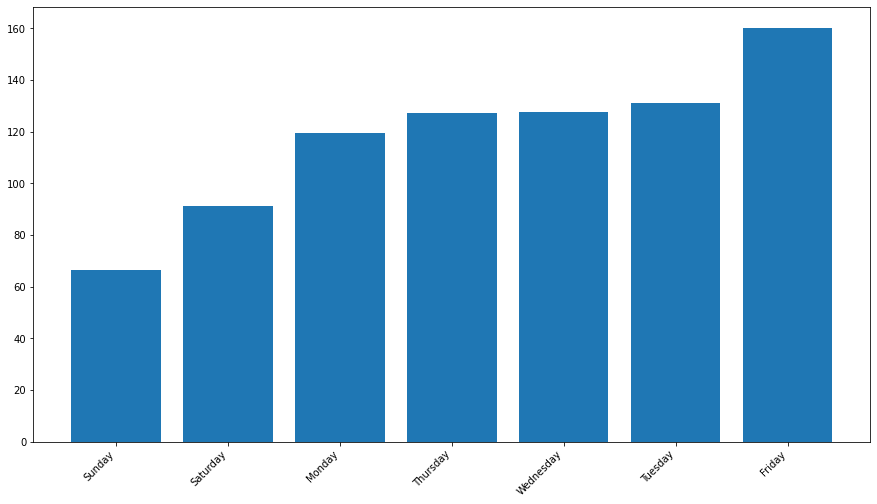

In [12]:
st_y = df5.groupby(["Station"])["Turnike_Yogunluk"].mean()
gün_y = pd.DataFrame(df5.groupby("Day")["Turnike_Yogunluk"].mean().sort_values(ascending=True))
plt.figure(figsize=[15,8]);
plt.bar(gün_y.index, gün_y.Turnike_Yogunluk);
plt.xticks(rotation=45, ha='right');

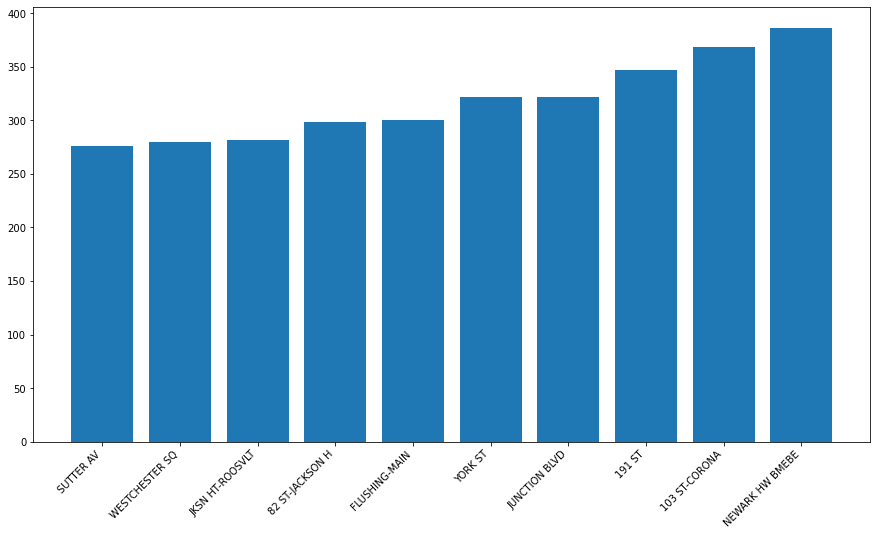

In [13]:
st_y = pd.DataFrame(df5.groupby("Station")["Turnike_Yogunluk"].mean().sort_values(ascending=True))
st_y.dropna(inplace=True)
station_y = st_y.tail(10)
plt.figure(figsize=[15,8]);
plt.bar(station_y.index, station_y.Turnike_Yogunluk);
plt.xticks(rotation=45, ha='right');

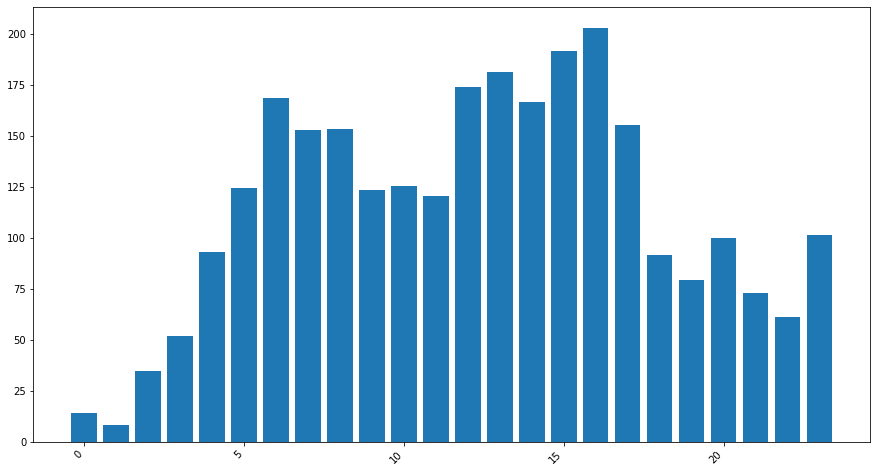

In [14]:
time_y = pd.DataFrame(df5.groupby("Hour")["Turnike_Yogunluk"].mean().sort_values(ascending=True))
plt.figure(figsize=[15,8]);
plt.bar(time_y.index, time_y.Turnike_Yogunluk);
plt.xticks(rotation=45, ha='right');